In [1]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0   2705      0 --:--:-- --:--:-- --:--:--  2705
Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os

from fastai.vision import *

In [0]:
folder = 'cubism'
file = 'cubism.txt'

In [0]:
folder = 'fauvism'
file = 'fauvism.txt'

In [0]:
folder = 'popart'
file = 'popart.txt'

In [0]:
folder = 'surrealism'
file = 'surrealism.txt'

In [0]:
folder = 'expressionism'
file = 'expressionism.txt'

In [0]:
folder = 'impressionism'
file = 'impressionism.txt'

In [0]:
folder = 'romantictism'
file = 'romantictism.txt'

In [52]:
ds_path = os.path.join(root_dir, 'datasets/art', folder)
file_path = os.path.join(ds_path, file)

with open(file_path) as f:
  print(f.readlines()[0])

https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTV_pWzB_pyW_8lJAia8TO92YiXGef5K1VahRvhTxX0WuV40MZB&usqp=CAU



Download Art Dataset

In [53]:
download_images(file_path, ds_path, max_pics=200)

Verify Downloads


In [0]:
classes = ['cubism','popart', 'surrealism', 'expressionism', 'impressionism', 'romantictism']

In [78]:
ds_path = os.path.join(root_dir, 'datasets/art/')

for c in classes:
    print(c)
    verify_images(ds_path + c, delete=True, max_size=500)

cubism


popart


surrealism


expressionism


impressionism


romantictism


View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(ds_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [81]:
data.classes

['cubism',
 'expressionism',
 'impressionism',
 'popart',
 'romantictism',
 'surrealism']

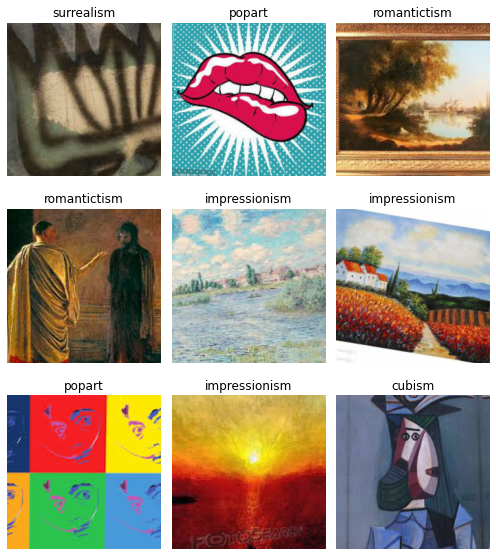

In [82]:
data.show_batch(rows=3, figsize=(7,8))

In [115]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cubism',
  'expressionism',
  'impressionism',
  'popart',
  'romantictism',
  'surrealism'],
 6,
 960,
 240)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [125]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.874357,1.401876,0.295833,00:12
1,1.477492,1.169115,0.295833,00:12
2,1.142628,0.866140,0.270833,00:11
3,0.909391,0.843828,0.266667,00:11


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [128]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


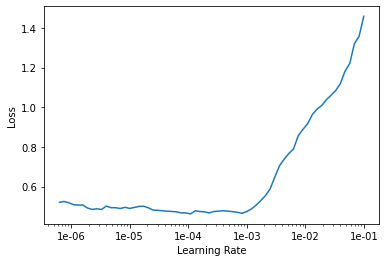

In [129]:
learn.recorder.plot()

In [131]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (960 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
surrealism,surrealism,surrealism,surrealism,surrealism
Path: /content/gdrive/My Drive/datasets/art;

Valid: LabelList (240 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
romantictism,popart,surrealism,impressionism,surrealism
Path: /content/gdrive/My Drive/datasets/art;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias

In [0]:
learn.save('stage-2')

In [134]:
interp = ClassificationInterpretation.from_learner(learn)

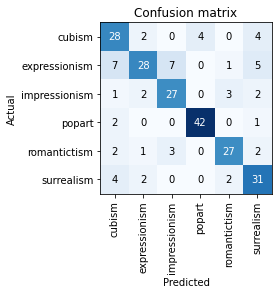

In [135]:
interp.plot_confusion_matrix()

Cleaning up

In [0]:
from fastai.widgets import *

In [0]:
path = os.path.join(root_dir, 'datasets/art')

db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet50, metrics=error_rate)

learn_cln.load('stage-2');

In [140]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [111]:
# for mac terminal, use the command below; for windows cmd, add '--user' to the end of each command.

###  First, reinstall ipywidgets and widgetsnbextension 
! pip install --upgrade --force-reinstall ipywidgets

! pip install --upgrade --force-reinstall widgetsnbextension 

### Second, install jupyter-js-widgets/extension
! jupyter nbextension install --py widgetsnbextension

### Third, enable  widgetsnbextension
! jupyter nbextension enable --py widgetsnbextension --sys-prefix

     |████████████████████████████████| 122kB 4.6MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 174kB 63.2MB/s 
     |████████████████████████████████| 122kB 56.3MB/s 
     |████████████████████████████████| 788kB 62.4MB/s 
     |████████████████████████████████| 2.2MB 52.4MB/s 
     |████████████████████████████████| 92kB 13.7MB/s 
     |████████████████████████████████| 61kB 9.9MB/s 
     |████████████████████████████████| 501kB 53.0MB/s 
     |████████████████████████████████| 112kB 57.7MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 583kB 49.7MB/s 
     |████████████████████████████████| 921kB 44.5MB/s 
     |████████████████████████████████| 1.1MB 52.8MB/s 
     |████████████████████████████████| 358kB 56.2MB/s 
     |████████████████████████████████| 9.7MB 51.2MB/s 
     |████████████████████████████████| 112kB 60.5MB/s 
     |████████████████████████████████| 1.1MB 51.3MB/s 

  Using cached https://files.pythonhosted.org/packages/6c/7b/7ac231c20d2d33c445eaacf8a433f4e22c60677eb9776c7c5262d7ddee2d/widgetsnbextension-3.5.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b1/f1/0a67f09ef53a342403ffa66646ee39273e0ac79ffa5de5dbe2f3e28b5bdf/notebook-6.0.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ff/96/1d9a2c23990aea8f8e0b5c3b6627d03196a73771a17a2d9860bbe9823ab6/terminado-0.8.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/63/0d/df2d17cdf389cea83e2efa9a4d32f7d527ba78667e0153a8e676e957b2f7/jupyter_core-4.6.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/34/0b/2ebddf775f558158ca8df23b35445fb15d4b1558a9e4a03bc7e75b13476e/jupyter_client-6.1.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/41/fa/e6e10410f01b03d10ab0705717d1246f63cdbbc0676140c78f0f757db332/pyzmq-19.0.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.

Installing /usr/local/lib/python3.6/dist-packages/widgetsnbextension/static -> jupyter-js-widgets
Up to date: /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js.map
Up to date: /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable widgetsnbextension --py
    
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


In [141]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [142]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [114]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

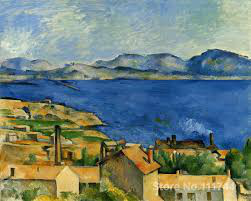

In [147]:
img = open_image(path + '/impressionism' + '/00000021.jpg')
img

In [0]:
learn = load_learner(path)

In [149]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category impressionism